# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a Kaggle competition on classifying dog breeds.

https://www.kaggle.com/c/dog-breed-identification

## Objectives

You will be able to:
* Independently design and build a CNN for image classifcation tasks
* Compare and apply multiple techniques for tuning a model including data augmentation and adapting pretrained models

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarened that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found here:

https://www.kaggle.com/c/dog-breed-identification/data

We recommend downloading the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders.

In [1]:
import time
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import numpy as np
import os, shutil
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.


## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that we've been providing you. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall from our previous work that you'll also want to use one-hot encoding as we are now presented with a multi-class problem as opposed to simple binary classification.

In [2]:
#No code persay, but download and decompress the data.
labels = pd.read_csv('labels.csv')
labels.set_index('id', inplace = True)
labels.head()

,breed
id,
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10222 entries, 000bec180eb18c7604dcecc8fe0dba07 to fff43b07992508bc822f33d8ffd902ae
Data columns (total 1 columns):
breed    10222 non-null object
dtypes: object(1)
memory usage: 159.7+ KB


In [4]:
breed_list = list(labels['breed'].unique())
breed_list

['boston_bull',
 'dingo',
 'pekinese',
 'bluetick',
 'golden_retriever',
 'bedlington_terrier',
 'borzoi',
 'basenji',
 'scottish_deerhound',
 'shetland_sheepdog',
 'walker_hound',
 'maltese_dog',
 'norfolk_terrier',
 'african_hunting_dog',
 'wire-haired_fox_terrier',
 'redbone',
 'lakeland_terrier',
 'boxer',
 'doberman',
 'otterhound',
 'standard_schnauzer',
 'irish_water_spaniel',
 'black-and-tan_coonhound',
 'cairn',
 'affenpinscher',
 'labrador_retriever',
 'ibizan_hound',
 'english_setter',
 'weimaraner',
 'giant_schnauzer',
 'groenendael',
 'dhole',
 'toy_poodle',
 'border_terrier',
 'tibetan_terrier',
 'norwegian_elkhound',
 'shih-tzu',
 'irish_terrier',
 'kuvasz',
 'german_shepherd',
 'greater_swiss_mountain_dog',
 'basset',
 'australian_terrier',
 'schipperke',
 'rhodesian_ridgeback',
 'irish_setter',
 'appenzeller',
 'bloodhound',
 'samoyed',
 'miniature_schnauzer',
 'brittany_spaniel',
 'kelpie',
 'papillon',
 'border_collie',
 'entlebucher',
 'collie',
 'malamute',
 'welsh

In [5]:
n_breeds = len(breed_list)
print(n_breeds)

120


In [7]:
data_dir_train = 'train_images'
imgs_train = [file for file in os.listdir(data_dir_train)]
n_train = len(imgs_train)
print(len(imgs_train))

10222


In [8]:
x = imgs_train[0][:-4]
print(x)
labels.loc[x].values[0]

000bec180eb18c7604dcecc8fe0dba07


'boston_bull'

In [10]:
val_prop = 0.1
test_prop = 0.1
np.random.seed(123)

train_index = list(range(0, n_train))

val_index = np.random.choice(train_index, size = round(val_prop*n_train), replace = False)
train_index = [x for x in train_index if x not in val_index]

test_index = np.random.choice(train_index, size = round(test_prop*n_train), replace = False)
train_index = [x for x in train_index if x not in test_index]

n_train = len(train_index)
n_val = len(val_index)
n_test = len(test_index)
print(len(train_index), len(test_index), len(val_index))

8178 1022 1022


We wish to create our standard directory structure:
* train
    * category1
    * category2
    * category3
    ...
* val
    * category1
    * category2
    * category3
    ...
* test 
    * category1
    * category2
    * category3
    ...  

In [ ]:
for breed in breed_list:
    os.mkdir(f'train\{breed}')
    os.mkdir(f'val\{breed}')
    os.mkdir(f'test\{breed}')

In [ ]:
for i in train_index:
    img_file = imgs_train[i]
    img_id = img_file[:-4]
    img_class = labels.loc[img_id].values[0]
    origin = os.path.join(data_dir_train, img_file)
    destination = os.path.join(f'train\{img_class}', img_file)
    shutil.copyfile(origin, destination)

In [ ]:
for i in val_index:
    img_file = imgs_train[i]
    img_id = img_file[:-4]
    img_class = labels.loc[img_id].values[0]
    origin = os.path.join(data_dir_train, img_file)
    destination = os.path.join(f'val\{img_class}', img_file)
    shutil.copyfile(origin, destination)

In [ ]:
for i in test_index:
    img_file = imgs_train[i]
    img_id = img_file[:-4]
    img_class = labels.loc[img_id].values[0]
    origin = os.path.join(data_dir_train, img_file)
    destination = os.path.join(f'test\{img_class}', img_file)
    shutil.copyfile(origin, destination)

In [18]:
#Your code here; open the labels.csv file stored in the zip file
res = 64

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'train', 
        target_size=(res, res), batch_size = n_train) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'val', 
        target_size=(res, res), batch_size = n_val) 

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'test', 
        target_size=(res, res), batch_size = n_test) 

Found 8178 images belonging to 120 classes.
Found 1022 images belonging to 120 classes.
Found 1022 images belonging to 120 classes.


In [19]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [20]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 8178
Number of testing samples: 1022
Number of validation samples: 1022
train_images shape: (8178, 64, 64, 3)
train_labels shape: (8178, 120)
test_images shape: (1022, 64, 64, 3)
test_labels shape: (1022, 120)
val_images shape: (1022, 64, 64, 3)
val_labels shape: (1022, 120)


## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [14]:
from keras import models
from keras import layers


In [15]:
#Create a baseline CNN model
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128 ,128,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(n_breeds, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#history = model.fit(train_images,
#                    train_labels,
#                    epochs=10,
#                    batch_size=500,
#                    validation_data=(val_images, val_labels))

## Loading a Pretrained CNN

In [21]:
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(res, res, 3))

In [32]:
def extract_features(directory, sample_amount):
    
    features = np.zeros(shape=(sample_amount, 2, 2, 512)) 
    labels = np.zeros(shape=(sample_amount, n_breeds))
    
    batch_size = 2
    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory, target_size=(res, res), 
        batch_size = batch_size, 
        class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = cnn_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size, :] = labels_batch
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels

In [33]:
train_features, train_labels = extract_features('train', n_train) 
validation_features, validation_labels = extract_features('val', n_val) 
test_features, test_labels = extract_features('test', n_test)

train_features = np.reshape(train_features, (n_train, 2 * 2 * 512))
validation_features = np.reshape(validation_features, (n_val, 2 * 2 * 512))
test_features = np.reshape(test_features, (n_test, 2 * 2 * 512))

Found 8178 images belonging to 120 classes.
Found 1022 images belonging to 120 classes.
Found 1022 images belonging to 120 classes.


## Feature Engineering with the Pretrained Model

Now that you've loaded a pretrained model, it's time to adapt that convolutional base and add some fully connected layers on top in order to build a classifier from these feature maps.

In [40]:
#Your code here; add fully connected layers on top of the convolutional base
from keras import optimizers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005),  input_dim=2 * 2 * 512))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_dim=2 * 2 * 512))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005),  input_dim=2 * 2 * 512))
model.add(layers.Dense(120, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=10,
                    validation_data=(validation_features, validation_labels))

Train on 8178 samples, validate on 1022 samples
Epoch 1/20
8178/8178 [==============================] - 8s 975us/step - loss: 7.0808 - acc: 0.0153 - val_loss: 5.8806 - val_acc: 0.0205
Epoch 2/20
8178/8178 [==============================] - 7s 837us/step - loss: 5.5619 - acc: 0.0312 - val_loss: 5.4356 - val_acc: 0.0294
Epoch 3/20
8178/8178 [==============================] - 7s 843us/step - loss: 5.2371 - acc: 0.0456 - val_loss: 5.2290 - val_acc: 0.0372
Epoch 4/20
8178/8178 [==============================] - 7s 844us/step - loss: 5.0374 - acc: 0.0580 - val_loss: 5.0816 - val_acc: 0.0431
Epoch 5/20
8178/8178 [==============================] - 7s 842us/step - loss: 4.8967 - acc: 0.0665 - val_loss: 4.9996 - val_acc: 0.0470
Epoch 6/20
8178/8178 [==============================] - 7s 826us/step - loss: 4.7876 - acc: 0.0719 - val_loss: 4.9136 - val_acc: 0.0538
Epoch 7/20
8178/8178 [==============================] - 7s 839us/step - loss: 4.7015 - acc: 0.0814 - val_loss: 4.8406 - val_acc: 0.0538


## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

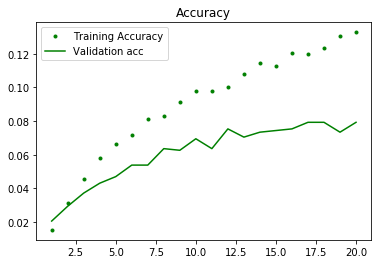

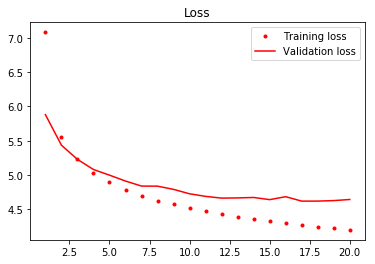

In [41]:
#Your code here; visualize the training / validation history associated with fitting the model.
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [42]:
#Save model
model.save('my_model.h5') 


## Final Model Evaluation

In [43]:
#Your code here
results_test = model.evaluate(test_features, test_labels)
results_test

1022/1022 [==============================] - 0s 100us/step


[4.632222752281831, 0.08512720176968322]

## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.